## 자동차 리콜 3개년 분석

## 데이터 출처
-  https://www.data.go.kr/data/3048950/fileData.do

[받은 파일]
- 2020년:자동차리콜현황(2020) v3.0.csv
- 2021년:자동차리콜현황(2021).csv
- 2022년:한국교통안전공단_자동차결함 리콜현황_20221231.csv

In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
#데이터 로드
df_1 = pd.read_csv('./data/자동차리콜현황(2020) v3.0.csv', encoding='euc_kr')
df_2 = pd.read_csv('./data/자동차리콜현황(2021).csv', encoding='euc_kr')
df_3 = pd.read_csv('./data/한국교통안전공단_자동차결함 리콜현황_20221231.csv', encoding='euc_kr')


In [59]:
# 데이터 병합
dfs = [df_1, df_2, df_3]
combined_df = pd.concat(dfs, axis=0)
combined_df

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
...,...,...,...,...,...,...
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...


In [60]:
# 데이터 중복 여부 및 개수 확인

combined_df[combined_df.duplicated(keep=False)]

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
34,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
82,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
1116,만트럭버스코리아(주),TGS,2016-10-17,2016-10-17,2021-09-01,"EGR 플랩의 내구성 부족으로 인한 EGR 플랩 파손(냉각수 누수, 플랩 파편의 연..."
1120,만트럭버스코리아(주),TGS,2016-10-17,2016-10-17,2021-09-01,"EGR 플랩의 내구성 부족으로 인한 EGR 플랩 파손(냉각수 누수, 플랩 파편의 연..."
1521,비엠더블유코리아(주),BMW 320d,2016-06-20,2020-07-31,2021-11-01,BMW 자체 품질조사 결과 2011년 3월 31일부터 2020년 8월 28일까지 생...
...,...,...,...,...,...,...
790,비엠더블유코리아(주),530d,2016-10-27,2018-09-05,2022-07-06,배기가스재순환장치 쿨러 내부 냉각수 누설 가능성
1144,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1145,스카니아코리아그룹(주),스카니아카고,2021-02-15,2021-02-16,2022-10-11,타이로드 끝 부분에 슬롯이 없는 타이로드가 장착되어 있을 가능성이 있습니다.
1216,(주)재규어랜드로버코리아,레인지로버 이보크 2.0D,2015-05-14,2017-07-27,2022-11-01,"엔진오일오염도 증가에 따른 엔진오일펌프, 타이밍체인의 마모 및 파손 엔진오일 서비스..."


In [61]:
# 데이터 중복 처리(삭제)
print("Before:", len(combined_df))
combined_df = combined_df.drop_duplicates()
print("After:", len(combined_df))

Before: 4656
After: 4498


## 1. 제조사별 리콜 현황
* 3년동안 리콜 건수가 가장 많은 제조사는?
* 시각화를 통해 근거 자료 만들기

In [62]:
combined_df['제작자'].value_counts()

제작자
비엠더블유코리아(주)           1660
메르세데스벤츠코리아(주)         1108
폭스바겐그룹코리아 주식회사         301
만트럭버스코리아(주)            137
현대자동차(주)               120
아우디폭스바겐코리아(주)          115
한불모터스(주)               102
(주)볼보자동차코리아             78
포드세일즈서비스코리아(유)          76
한국토요타자동차(주)             74
혼다코리아(주)                58
기아주식회사                  58
화창상사(주)                 53
(주)재규어랜드로버코리아           52
(주)에프엠케이                45
포르쉐코리아 주식회사             43
스텔란티스코리아주식회사            42
다임러트럭코리아(주)             40
스카니아코리아그룹(주)            30
테슬라코리아 유한회사             26
(주) 한국모터트레이딩            23
(유)기흥모터스                21
기흥인터내셔널 유한회사            21
기아자동차(주)                19
(주) 바이크코리아              17
유한회사 모토로싸               16
대전기계공업(주)               16
한국지엠주식회사                15
한국지엠(주)                 15
한국닛산(주)                 13
허스크바나모터싸이클코리아 주식회사      11
지엠코리아(주)                10
볼보트럭코리아(주)              10
르노코리아자동차 주식회사            8
(주)스포츠모터사이클코리아           8
에프씨에이코리아(주)              7
진일엔지니어링 주식회사            

In [129]:
tmp = combined_df.groupby('제작자').size().sort_values(ascending=False).to_frame('count')
tmp.head()

,count
제작자,
비엠더블유코리아(주),1660
메르세데스벤츠코리아(주),1108
폭스바겐그룹코리아 주식회사,301
만트럭버스코리아(주),137
현대자동차(주),120


In [135]:

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# font_path = './NanumGothic.ttf' # 폰트 위치
# plt.rc('font', family=font_name)

plt.rc('font', family='Malgun Gothic') # 윈도우
# plt.rc('font', family='AppleGothic') # 맥
plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 현상 해결


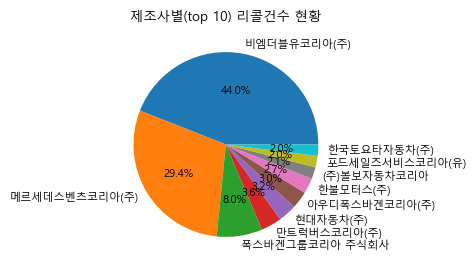

In [138]:
tmp = combined_df.groupby('제작자').size().sort_values(ascending=False).to_frame('count').head(10)

x = tmp.index
y = tmp['count']

plt.figure(figsize=(8,3))  
plt.pie(y,labels=x,autopct='%.1f%%')
plt.title('제조사별(top 10) 리콜건수 현황')
plt.show()  

```
문제: 3년동안 리콜건수가 가장 많은 제조사는?
답: 비엠더블유코리아(주)

```

## 2.(그나마) 튼튼하게 만드는 기업 vs  Worst 기업 top10

* 출고 년도부터 리콜 개시일 사이의 기간을 사용기간이라고 할때, 
* 이 사용기간이 길면 길수록 그나마 튼튼하게 만들었다고 볼 수 있다. 
* 물론, 여기 리콜현황에 등록되지 않은 제조사가 베스트이겠지만....
* 사용기간의 평균이 가장 높고 낮은 10개 기업 리스트를 알아보자

In [68]:
# 사용기간 컬럼 새로 만들기(파생변수 생성해서)
combined_df['생산기간(까지)'] = pd.to_datetime(combined_df['생산기간(까지)']) 

combined_df['리콜개시일'] = pd.to_datetime(combined_df['리콜개시일'])

combined_df['사용기간'] = (combined_df['리콜개시일'] - combined_df['생산기간(까지)']).dt.days
combined_df

C:\Users\hlmj3\AppData\Local\Temp\ipykernel_13756\3313816652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['생산기간(까지)'] = pd.to_datetime(combined_df['생산기간(까지)'])
C:\Users\hlmj3\AppData\Local\Temp\ipykernel_13756\3313816652.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['리콜개시일'] = pd.to_datetime(combined_df['리콜개시일'])
C:\Users\hlmj3\AppData\Local\Temp\ipykernel_13756\3313816652.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유,사용기간
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,1469
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,1470
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",176
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",139
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",141
...,...,...,...,...,...,...,...
1414,비엠더블유코리아(주),BMW i4 M50,2021-11-22,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,63
1415,비엠더블유코리아(주),BMW i4 eDrive40,2021-11-23,2022-10-24,2022-12-26,배터리 관리 모듈(SME)*과 관련한 제작 결함이 발견되었습니다. *배터리 관리 모...,63
1416,(주)스포츠모터사이클코리아,1290 SUPER DUKE R,2020-02-11,2022-04-29,2022-12-27,메인 와이어링 하네스와 차체 구성 부품 간의 간섭으로 인한 피복 손상으로 배선 단선...,242
1417,화창상사(주),SPRINGFIELD,2019-10-28,2020-06-03,2022-12-27,차량제어모듈(VEHICLE CONTROL MODULE) 및 커넥터 접촉 불량(헐거움...,937


In [92]:
# 제조사별 사용기간이 가장 긴 순서대로 정렬
tmp = combined_df.groupby('제작자')['사용기간'].mean().sort_values(ascending=False).to_frame()

# 결과 확인
tmp.head()

,사용기간
제작자,
한신특장,3349.000000
한국닛산(주),2501.461538
비엠더블유코리아(주),2023.324096
아이씨피(주),1902.000000
(주)다산중공업,1665.000000


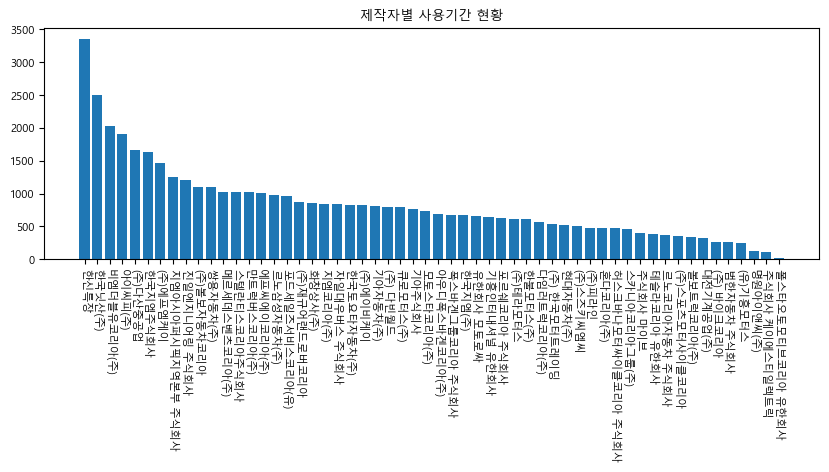

In [94]:
tmp = combined_df.groupby('제작자')['사용기간'].mean().sort_values(ascending=False).to_frame()

x = tmp.index
y = tmp['사용기간']
plt.figure(figsize=(10,3))        
plt.bar(x=x,height=y)            
plt.xticks(rotation=270)         
plt.title('제작자별 사용기간 현황') 
plt.show()  

In [95]:
tmp = combined_df.groupby('제작자')['사용기간'].mean().sort_values(ascending=False)

# 사용기간 평균이 가장 높은 상위 10개 기업
top_10 = tmp.head(10)
top_10

제작자
한신특장                 3349.000000
한국닛산(주)              2501.461538
비엠더블유코리아(주)          2023.324096
아이씨피(주)              1902.000000
(주)다산중공업             1665.000000
한국지엠주식회사             1626.200000
(주)에프엠케이             1466.066667
지엠아시아퍼시픽지역본부 주식회사    1247.000000
진일엔지니어링 주식회사         1201.833333
(주)볼보자동차코리아          1100.448718
Name: 사용기간, dtype: float64

In [96]:
# 사용기간 평균이 가장 낮은 하위 10개 기업
bottom_10 = tmp.tail(10)
bottom_10

제작자
르노코리아자동차 주식회사       374.625000
(주)스포츠모터사이클코리아      348.875000
볼보트럭코리아(주)          332.300000
대전기계공업(주)           328.187500
(주) 바이크코리아          269.647059
범한자동차 주식회사          261.750000
(유)기흥모터스            254.952381
명원아이앤씨(주)           128.000000
주식회사 케이에스티일렉트릭      113.000000
폴스타오토모티브코리아 유한회사     22.000000
Name: 사용기간, dtype: float64

```
문제:그나마 튼튼 제조사 top 3는?
답: 한신특장, 한국닛산(주), 비엠더블유코리아(주) 
```

## 3. 리콜이 가장 많은 제조사 1위의 리콜 원인은 ?
* 리콜 대마왕 XXX 기업의 문제의 모델 xxx에 대해 대규모 손해배상청구 소송을 진행하려 한다. 
* 이 회사의 주요 리콜 사유를 알아내고,(워드 클라우드로 제작해서 키워드 추출)
* 해당 사유로 리콜된 최고 문제 모델을 찾아내서
* 소송으로 가즈아~

In [97]:
# 리콜건수가 가장 많은 제조사는?
top = combined_df.groupby('제작자').size().sort_values(ascending=False).to_frame('count')
top.head()

,count
제작자,
비엠더블유코리아(주),1660
메르세데스벤츠코리아(주),1108
폭스바겐그룹코리아 주식회사,301
만트럭버스코리아(주),137
현대자동차(주),120


In [98]:
# 리콜 사유는?

combined_df['리콜사유'].drop_duplicates().values

array(['스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑 & 고) 2) 결함 원인 : 오토 스타트 결함(스탑&고 작동 시 재시동 불가 현상)은 과도한 전압강하로 인해 발생되며 이는 충분한 전류량이 흐를 수 없는 불충분한 엔진 배선 및 주 양극 배선 사이즈로 인해 유발됨',
       '콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품 내부에 균열이 발생할 가능성이 있음.',
       '뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부의 스프링이 바르게 장착 되지 않았을 가능성이 있음. *시트벨트 리트랙터 잠금장치: 급정지나 충격이 있을 경우 또는 시트벨트가 빠르게 당겨질 경우에 시트벨트가 풀어지지 않게 잠그는 장치',
       '비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 운행조건에서 크랭크축이 파손될 수 있는 가능성이 확인되었습니다.',
       '사이드 스탠드 제조 공정상 용접 불량으로 사이드 스탠드의 용접 부위가 부러질 수 있음. (#참고 사항 : 2019년식 이후 모델에 장착된 사이드 스탠드는 공급사가 바뀌면서 이와 같은 문제 없음)',
       '2019년 01월 30일부터 2019년 10월 21일까지 생산된 BMW M5, M8 Competition 모델 중 171대 차량의 변속기 배선 고정 공정 과정에서 배선을 고정하는 클립을 잘 못 장착하여 고정된 위치가 과도한 압착 및 변속기 등 주변에서 발생하는 열에 영향을 받아 배선이 단락 될 수 있습니다.',
       '2017년식 Explorer 차량의 전동시트(파워시트) 프레임 트랙의 가장자리에 날카로운 마무리가 남아있을 수 있습니다. 이렇게, 시트 프레임 트랙의 날카로운 마무리로 인하여, 앞좌석과 콘솔 사이에 손을 넣으면 다칠 수 있는 위험이 있기 때문에 이를 예방하기 위해 제작결함을 시정하고자 함',
       '2015-2018년식 

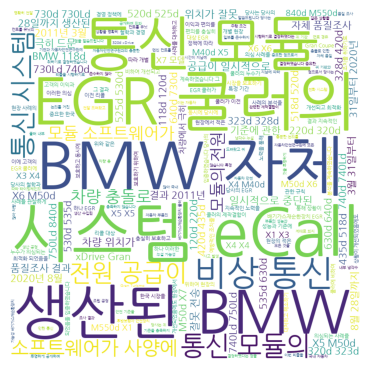

In [102]:
# 워드클라우드를 사용해 키워드 추출

from wordcloud import WordCloud, STOPWORDS
set(STOPWORDS)
spwords = set(['일부','위한','맞지','되었습니다','발견','되었습니다.',"수이기는","적은 수이기는","동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당", "있어", "내에",
                "못", '으로", "의한', "위해", '후', '할', '로', '더', '와', '나', '전', '매우', '등', '내에', '을', '함'])

caselist = combined_df['리콜사유'].values
text = ' '.join(caselist)
len(text)


font_path = './NanumGothic.ttf'
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path=font_path,
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(6, 4))
plt.imshow(wc1)
plt.tight_layout()
plt.axis('off')
plt.show()


In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [114]:
tfv = TfidfVectorizer(min_df = 5, max_features=500)
dtm = tfv.fit_transform(df['리콜사유'])

In [116]:
features = tfv.get_feature_names_out()

features

array(['027', '1주행', '2015년식', '2021', '2021년', '2022', '2022riv063',
       '2022년', '2022년식', '3열', '90', 'a61', 'and', 'b47d', 'band', 'bgk',
       'bmw', 'cn7', 'coefficient', 'control', 'dde', 'ecall', 'egr',
       'elastic', 'esc', 'fmvss', 'hands', 'integrated', 'leakage',
       'module', 'off', 'on', 'positive', 'ptc', 'sam', 'sealing',
       'temperature', 'tm', 'vehicle', 'voltage', 'x7', '가능성', '가능성으로',
       '가능성이', '가스발생기', '감소를', '감지', '감지하지', '거리와', '것으로', '것을', '게이트웨이',
       '겨울철', '결과', '결함', '결함이', '결합', '결합된', '경고등', '경고등이', '경우', '계기판',
       '계기판에', '고무', '고압연료펌프내', '고장', '고전압', '고정', '고정너트', '고정되지', '공급',
       '공급업체의', '공급에', '공급이', '공기통로의', '공정', '공정의', '과정에서', '관련', '관련하여',
       '관한', '교체하는', '구동장치', '구리관', '구성', '국내', '규칙', '그리고', '금속', '기간',
       '기능', '기능고장', '기능을', '기능입니다', '기어', '기준에', '기준을', '긴급', '나사가',
       '내구성', '내부', '내부로', '내부부품', '내부에', '내부의', '냉각수', '냉각수가', '너트를',
       '누설', '누수가', '누유되서', '누출', '능동적으로', '당사에서', '당사의', '대기압', '대기압

In [117]:
dtmdf = pd.DataFrame(dtm.toarray(), columns=features)

In [123]:
dtmdf.sum().sort_values(ascending=False).head(20)

냉각수          84.168045
있습니다         81.305594
내부           69.034219
가능성          68.097233
쿨러           64.353267
자동차          64.021327
누설           63.910925
배기가스재순환장치    63.910925
가능성이         53.085817
오류로          48.532263
차량           47.197391
블로우바이히터      44.837200
엔진           43.138410
인해           41.866877
컨트롤          41.003882
소프트웨어        40.806049
않을           40.041735
않아           39.863781
공정           39.098258
일부           38.523004
dtype: float64

In [127]:
# 냉각수, 쿨러, 누설, 배기가스재순환장치, 블로우바이히터, 엔진, 컨트롤, 소프트웨어, 공정이 가장 많이 나타납니다.

In [125]:
combined_df[combined_df['리콜사유'].str.contains('냉각수')]['차명'].value_counts()

차명
TGS                                  22
520d                                  9
520d xDrive                           8
420d Coupe                            6
420d xDrive Gran Coupe                6
                                     ..
Citroen C4 New Cactus 1.5 BlueHDi     1
MINI Cooper SD Countryman ALL4        1
MINI Cooper SD                        1
MINI Cooper D five-door               1
FTR 1200                              1
Name: count, Length: 165, dtype: int64

In [126]:
combined_df[combined_df['리콜사유'].str.contains('냉각수')]['제작자'].value_counts()

제작자
비엠더블유코리아(주)       232
메르세데스벤츠코리아(주)      51
한불모터스(주)           28
(주)볼보자동차코리아        24
만트럭버스코리아(주)        24
화창상사(주)             4
폭스바겐그룹코리아 주식회사      3
기아주식회사              2
포드세일즈서비스코리아(유)      2
혼다코리아(주)            1
Name: count, dtype: int64

```
리콜 주요 원인은? 냉각수, 쿨러, 누설, 배기가스재순환장치, 블로우바이히터

그래서, 가장 나쁜 모델은? TGS, 520d, 520d xDrive

```